Copyright (c) Microsoft Corporation. All rights reserved. Licensed under the MIT License.

# Randomly generated CyberBattle network environment for Active Directory

In [28]:
from cyberbattle.simulation.model import *
import cyberbattle.samples.active_directory.generate_ad as ad
import cyberbattle.simulation.commandcontrol as commandcontrol
import logging, sys, random
random.seed(1)
logging.basicConfig(stream=sys.stdout, level=logging.INFO, format="%(levelname)s: %(message)s")
%matplotlib inline 

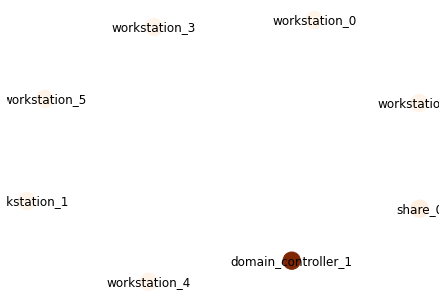

In [29]:
env = ad.new_random_environment(42)
env.plot_environment_graph()

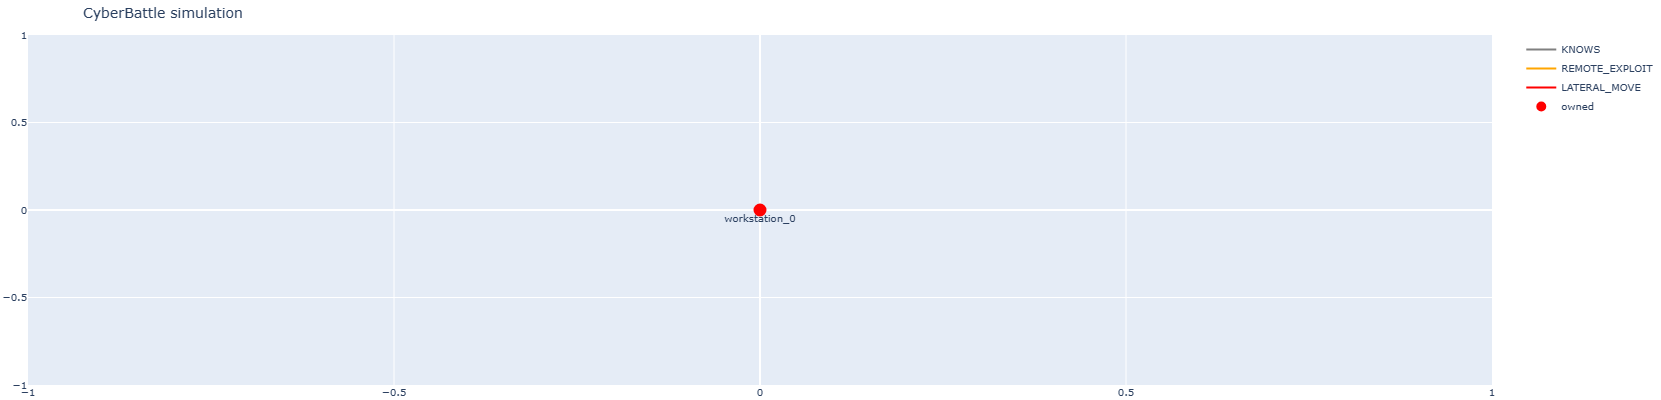

,status,properties,local_attacks,remote_attacks
id,,,,
workstation_0,owned,[breach_node],"[FindDomainControllers, EnumerateFileShares, A...",[]


In [30]:
c2 = commandcontrol.CommandControl(env)
dbg = commandcontrol.EnvironmentDebugging(c2)

# 1 - Start from client
dbg.plot_discovered_network()
c2.print_all_attacks()

INFO: discovered node: domain_controller_1
INFO: GOT REWARD: Found domain controllers


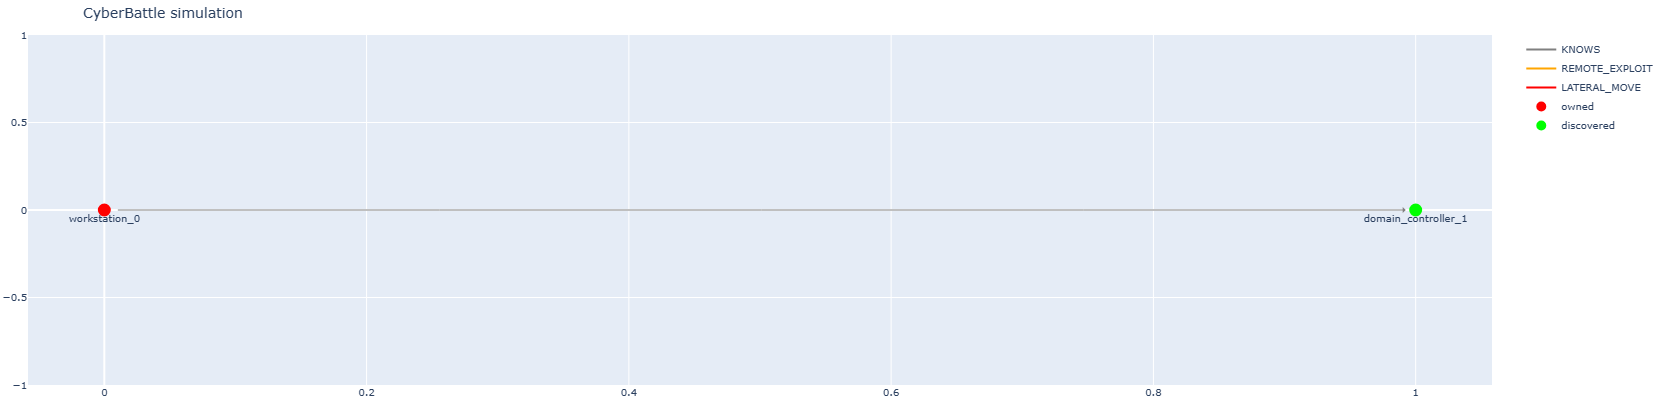

,status,properties,local_attacks,remote_attacks
id,,,,
workstation_0,owned,[breach_node],"[FindDomainControllers, EnumerateFileShares, A...",[]
domain_controller_1,discovered,NaN,None,[]


In [31]:
outcome = c2.run_attack('workstation_0', 'FindDomainControllers')
dbg.plot_discovered_network()
c2.print_all_attacks()

INFO: discovered node: share_0
INFO: GOT REWARD: Found shares


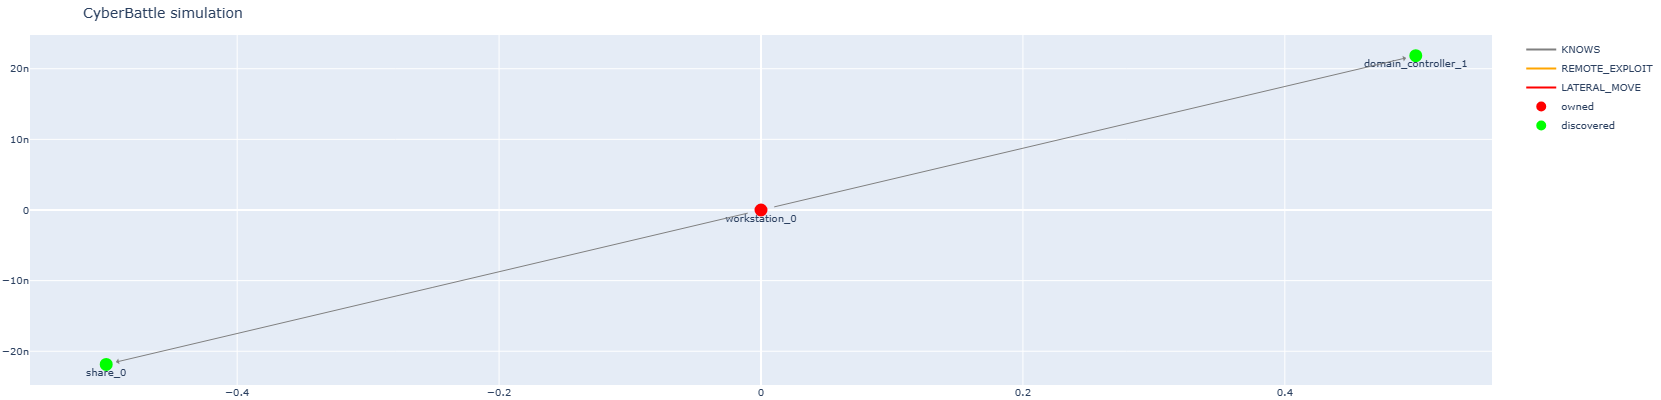

,status,properties,local_attacks,remote_attacks
id,,,,
workstation_0,owned,[breach_node],"[FindDomainControllers, EnumerateFileShares, A...",[]
domain_controller_1,discovered,NaN,None,[]
share_0,discovered,NaN,None,[]


In [32]:
outcome = c2.run_attack('workstation_0', 'EnumerateFileShares')
dbg.plot_discovered_network()
c2.print_all_attacks()

INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_48')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_28')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_31')
INFO: discovered node: workstation_0
INFO: discovered credential: CachedCredential(node='workstation_0', port='SHELL', credential='user_48')
INFO: discovered node: workstation_4
INFO: discovered credential: CachedCredential(node='workstation_4', port='SHELL', credential='user_28')
INFO: discovered node: workstation_1
INFO: discovered credential: CachedCredential(node='workstation_1', port='SHELL', credential='user_31')
INFO: GOT REWARD: 


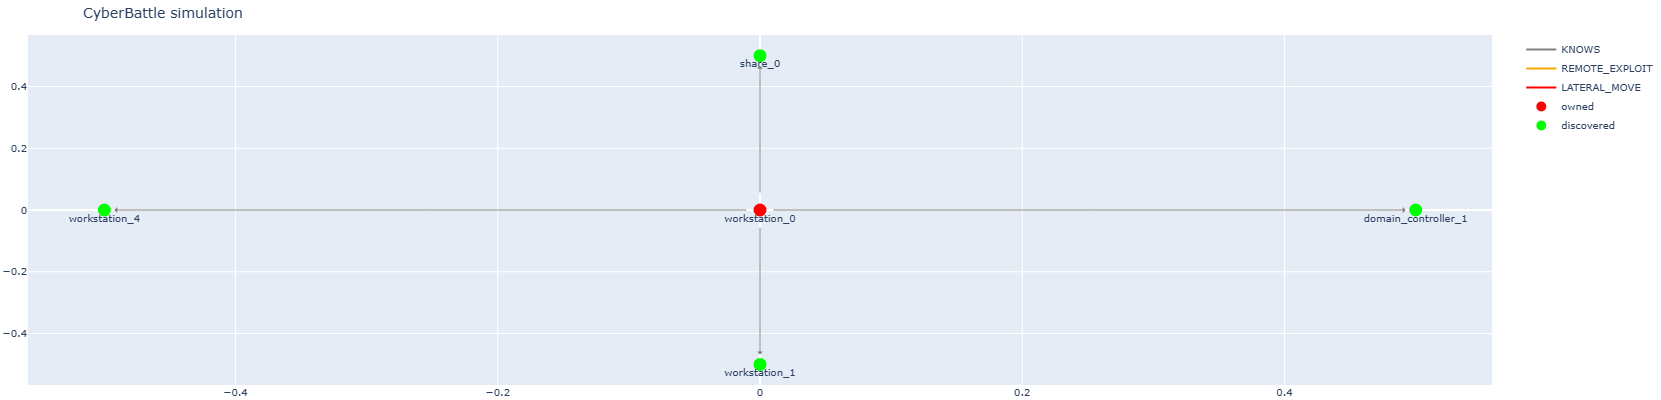

,status,properties,local_attacks,remote_attacks
id,,,,
workstation_0,owned,[breach_node],"[FindDomainControllers, EnumerateFileShares, A...",[]
domain_controller_1,discovered,NaN,None,[]
share_0,discovered,NaN,None,[]
workstation_4,discovered,NaN,None,[]
workstation_1,discovered,NaN,None,[]


In [33]:
outcome = c2.run_attack("workstation_0", "AuthorizationSpoofAndCrack")
dbg.plot_discovered_network()
c2.print_all_attacks()

INFO: Infected node 'workstation_4' from 'workstation_0' via SHELL with credential 'user_28'


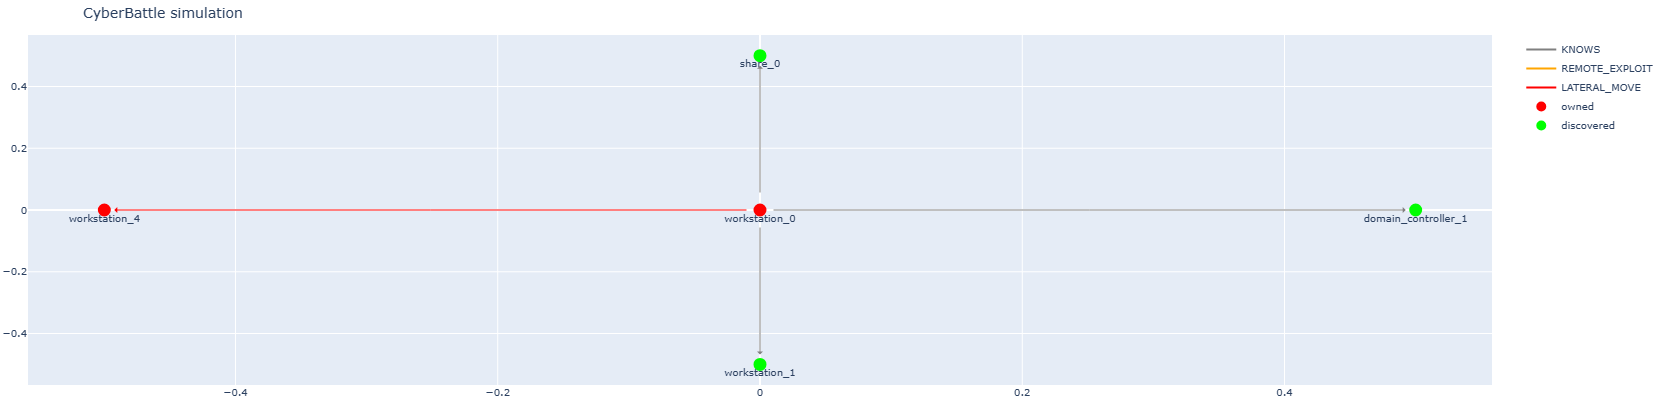

,status,properties,local_attacks,remote_attacks
id,,,,
workstation_0,owned,[breach_node],"[FindDomainControllers, EnumerateFileShares, A...",[]
workstation_4,owned,[admin],"[FindDomainControllers, EnumerateFileShares, S...",[]
domain_controller_1,discovered,NaN,None,[]
share_0,discovered,NaN,None,[]
workstation_1,discovered,NaN,None,[]


In [35]:
c2.connect_and_infect("workstation_0", "workstation_4", "SHELL", "user_28")
dbg.plot_discovered_network()
c2.print_all_attacks()

INFO: discovered node: domain_controller_1
INFO: discovered credential: CachedCredential(node='domain_controller_1', port='AD', credential='dc_1')
INFO: GOT REWARD: DA credentials found


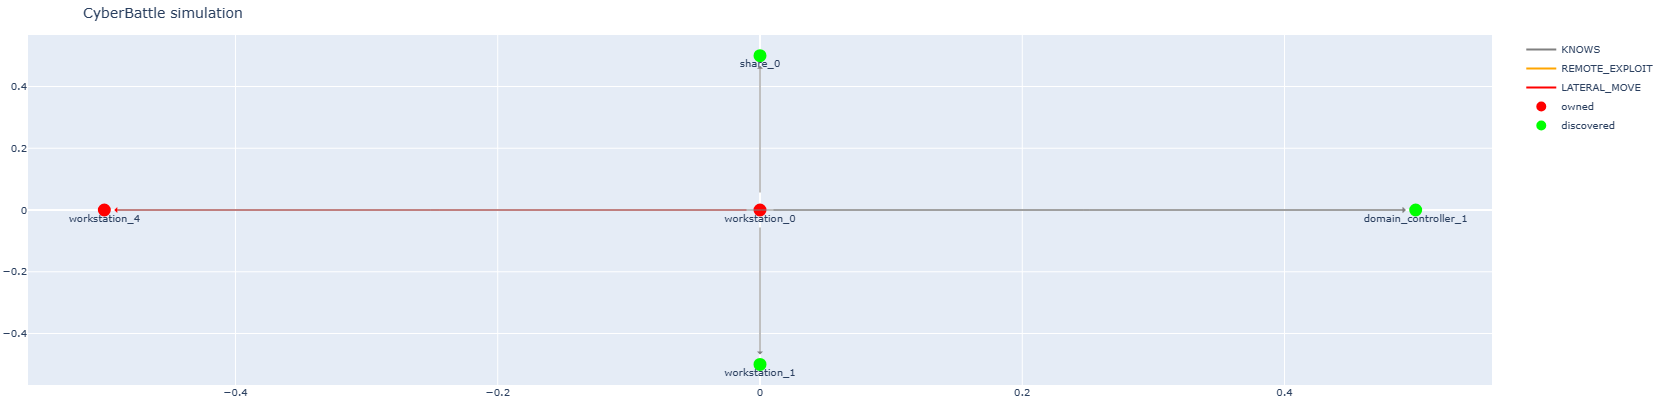

,status,properties,local_attacks,remote_attacks
id,,,,
workstation_0,owned,[breach_node],"[FindDomainControllers, EnumerateFileShares, A...",[]
workstation_4,owned,[admin],"[FindDomainControllers, EnumerateFileShares, S...",[]
domain_controller_1,discovered,NaN,None,[]
share_0,discovered,NaN,None,[]
workstation_1,discovered,NaN,None,[]


In [36]:
c2.run_attack('workstation_4', 'ScanForCreds')
dbg.plot_discovered_network()
c2.print_all_attacks()


INFO: Infected node 'domain_controller_1' from 'workstation_0' via AD with credential 'dc_1'


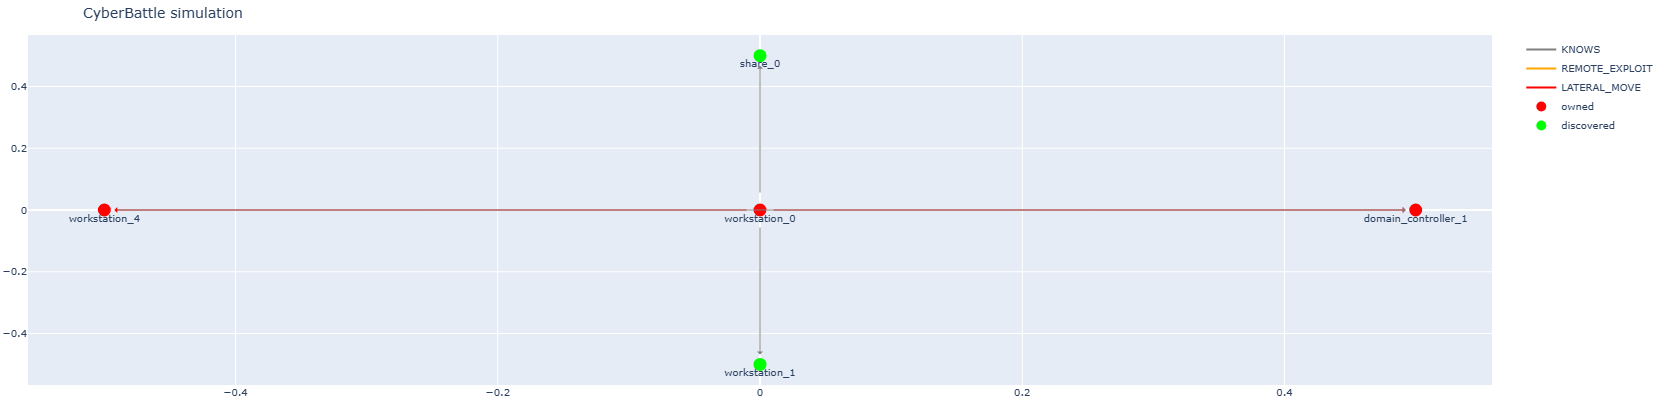

,status,properties,local_attacks,remote_attacks
id,,,,
workstation_0,owned,[breach_node],"[FindDomainControllers, EnumerateFileShares, A...",[]
domain_controller_1,owned,[domain_controller],"[FindDomainControllers, DumpNTDS, EnumerateFil...",[]
workstation_4,owned,[admin],"[FindDomainControllers, EnumerateFileShares, S...",[]
share_0,discovered,NaN,None,[]
workstation_1,discovered,NaN,None,[]


In [37]:
c2.connect_and_infect("workstation_0", "domain_controller_1", "AD", "dc_1")
dbg.plot_discovered_network()
c2.print_all_attacks()


INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_0')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_1')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_2')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_3')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_4')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_5')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_6')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='u

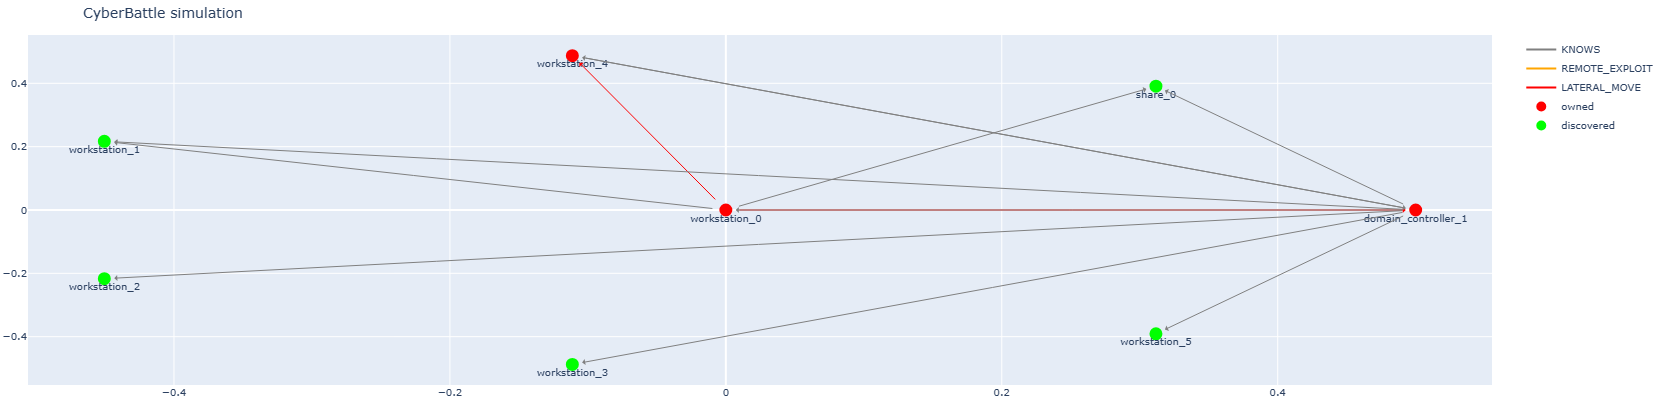

,status,properties,local_attacks,remote_attacks
id,,,,
workstation_0,owned,[breach_node],"[FindDomainControllers, EnumerateFileShares, A...",[]
domain_controller_1,owned,[domain_controller],"[FindDomainControllers, DumpNTDS, EnumerateFil...",[]
workstation_4,owned,[admin],"[FindDomainControllers, EnumerateFileShares, S...",[]
share_0,discovered,NaN,None,[]
workstation_1,discovered,NaN,None,[]
workstation_2,discovered,NaN,None,[]
workstation_3,discovered,NaN,None,[]
workstation_5,discovered,NaN,None,[]


In [38]:
c2.run_attack('domain_controller_1', 'DumpNTDS')
dbg.plot_discovered_network()
c2.print_all_attacks()